In [16]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
import gensim
from gensim import corpora

In [63]:
df_users=pd.read_csv('users.csv')

In [65]:
df_users.sort_values('favourites_count',ascending=False)

,created_at,description,favourites_count,followers_count,friends_count,id,location,name
230,1970-01-01 00:00:01.420495744+00:00,Representing Virginia's 8th District in Congre...,12507,31002,2501,2962868158,Northern Virginia & DC,Rep. Don Beyer
406,1970-01-01 00:00:01.352665561+00:00,Nelson's Dad. Husband. Rep SF Bay in Congress....,8034,85179,6717,942156122,"East Bay, CA & DC (CA-15)",Rep. Eric Swalwell
110,1970-01-01 00:00:01.348257060+00:00,U.S. Congressman (KY-1) Farmer. Former KY Comm...,6764,8703,973,838462994,"Monroe County, Kentucky",James Comer
85,1970-01-01 00:00:01.215572644+00:00,"father, entrepreneur,education policy, basebal...",5837,43250,4136,15361570,"Boulder, CO",Jared Polis
226,1970-01-01 00:00:01.268341531+00:00,Congresswoman proudly representing the First D...,5078,12171,1799,122174004,"Las Vegas, NV",Dina Titus
...,...,...,...,...,...,...,...,...
334,1970-01-01 00:00:01.245802867+00:00,"United States Representative, 4th District of ...",0,11989,0,50152441,"Washington, DC",Tom McClintock
366,1970-01-01 00:00:01.324477110+00:00,Serving the First Congressional District of Ma...,0,11208,29,442824717,NaN,Rep. Richard Neal
65,1970-01-01 00:00:01.289941716+00:00,Check here for updates from the Office of Gove...,0,75992,5463,216481299,"Saint Paul, MN",Governor Mark Dayton
372,2010-05-25 16:02:26+00:00,NaN,0,2473,95,148006729,Brigham City or D.C.,Rob Bishop


In [17]:
df=pd.read_csv('tweets2.csv')

C:\Users\bumst\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2,3,6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
df.describe()

,id,retweet_count,user_id,polarity,subjectivity
count,1.344684e+06,1.344656e+06,1.243342e+06,1.243342e+06,1.243342e+06
mean,5.824259e+17,1.758217e+02,1.397371e+16,1.515510e-01,3.393838e-01
std,2.269044e+17,9.562660e+03,1.053370e+17,2.878129e-01,3.222228e-01
min,0.000000e+00,0.000000e+00,5.558312e+06,-1.000000e+00,0.000000e+00
25%,4.213695e+17,1.000000e+00,3.375080e+07,0.000000e+00,0.000000e+00
50%,6.391637e+17,3.000000e+00,2.340223e+08,0.000000e+00,3.125000e-01
75%,7.739582e+17,9.000000e+00,9.931530e+08,3.166667e-01,5.500000e-01
max,8.721400e+17,3.637896e+06,8.547151e+17,1.000000e+00,1.000000e+00


In [26]:
import seaborn as sns

In [67]:
df_a=df[df.user_id==2962868158]

C:\Users\bumst\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

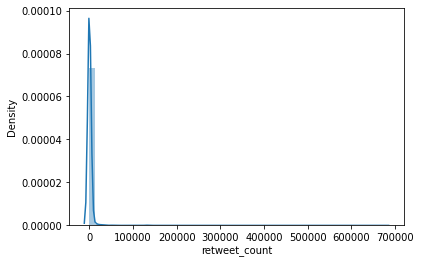

In [68]:
sns.distplot(df_a.retweet_count)

In [69]:
df_pop=df_a

In [70]:
len(df)

1344686

In [71]:
len(df_pop)

3258

In [72]:
doc_completea=df_pop.tweet_clean.tolist()

In [73]:
doc_complete=[]
for item in doc_completea:
    if type(item)==str:
        doc_complete.append(item)

In [74]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [75]:
doc_clean = [clean(doc).split() for doc in doc_complete] 

In [76]:
dictionary = corpora.Dictionary(doc_clean)

2021-02-07 11:40:53,243 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-07 11:40:53,397 : INFO : built Dictionary(6280 unique tokens: ['day', 'find', 'help', 'keepitpublic', 'land']...) from 3258 documents (total 35079 corpus positions)


In [77]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

In [78]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [79]:
# Running and Trainign LDA model on the document term matrix.
#ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [80]:
import logging

In [81]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [82]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, chunksize=100, update_every=1,passes=1)

2021-02-07 11:41:05,284 : INFO : using symmetric alpha at 0.3333333333333333
2021-02-07 11:41:05,287 : INFO : using symmetric eta at 0.3333333333333333
2021-02-07 11:41:05,292 : INFO : using serial LDA version on this node
2021-02-07 11:41:05,301 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 3258 documents, updating model once every 100 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
2021-02-07 11:41:05,304 : INFO : PROGRESS: pass 0, at document #100/3258
2021-02-07 11:41:05,532 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:05,541 : INFO : topic #0 (0.333): 0.017*"today" + 0.017*"rt" + 0.011*"woman" + 0.010*"register" + 0.010*"w" + 0.009*"find" + 0.008*"keep" + 0.007*"act" + 0.007*"american" + 0.007*"academy"
2021-02-07 11:41:05,544 : INFO : topic #1 (0.333): 0.020*"need" + 0.014*"rt" + 0.011*"hear" + 0.010*"today" + 0.010*"gun

2021-02-07 11:41:06,992 : INFO : PROGRESS: pass 0, at document #1000/3258
2021-02-07 11:41:07,107 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:07,112 : INFO : topic #0 (0.333): 0.028*"rt" + 0.019*"amp" + 0.017*"u" + 0.014*"foract" + 0.012*"religion" + 0.010*"muslimban" + 0.009*"3" + 0.009*"1" + 0.008*"bill" + 0.008*"2"
2021-02-07 11:41:07,117 : INFO : topic #1 (0.333): 0.014*"people" + 0.014*"thank" + 0.013*"one" + 0.011*"right" + 0.010*"house" + 0.009*"nobannowall" + 0.009*"rt" + 0.009*"many" + 0.008*"virginia" + 0.007*"care"
2021-02-07 11:41:07,120 : INFO : topic #2 (0.333): 0.030*"rt" + 0.019*"amp" + 0.018*"trump" + 0.013*"president" + 0.009*"friend" + 0.009*"u" + 0.007*"say" + 0.006*"rep" + 0.006*"muslimban" + 0.006*"response"
2021-02-07 11:41:07,122 : INFO : topic diff=0.273014, rho=0.316228
2021-02-07 11:41:07,126 : INFO : PROGRESS: pass 0, at document #1100/3258
2021-02-07 11:41:07,276 : INFO : merging changes from 100 documents int

2021-02-07 11:41:08,415 : INFO : topic diff=0.264737, rho=0.229416
2021-02-07 11:41:08,593 : INFO : -8.889 per-word bound, 474.2 perplexity estimate based on a held-out corpus of 100 documents with 1121 words
2021-02-07 11:41:08,595 : INFO : PROGRESS: pass 0, at document #2000/3258
2021-02-07 11:41:08,699 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:08,704 : INFO : topic #0 (0.333): 0.034*"rt" + 0.017*"amp" + 0.013*"epa" + 0.012*"u" + 0.012*"bill" + 0.009*"vote" + 0.008*"aca" + 0.007*"2" + 0.007*"today" + 0.007*"w"
2021-02-07 11:41:08,706 : INFO : topic #1 (0.333): 0.016*"gop" + 0.014*"house" + 0.014*"rt" + 0.013*"trumprussia" + 0.009*"care" + 0.009*"need" + 0.009*"one" + 0.008*"many" + 0.008*"people" + 0.007*"right"
2021-02-07 11:41:08,710 : INFO : topic #2 (0.333): 0.042*"rt" + 0.018*"amp" + 0.015*"trump" + 0.014*"climate" + 0.010*"health" + 0.008*"hearing" + 0.008*"time" + 0.008*"president" + 0.007*"u" + 0.007*"change"
2021-02-07 11:41:

2021-02-07 11:41:10,075 : INFO : topic #1 (0.333): 0.024*"trumprussia" + 0.021*"rt" + 0.014*"house" + 0.013*"people" + 0.010*"trumpcare" + 0.010*"fbi" + 0.009*"care" + 0.008*"gop" + 0.008*"investigation" + 0.008*"need"
2021-02-07 11:41:10,079 : INFO : topic #2 (0.333): 0.055*"rt" + 0.024*"trump" + 0.016*"amp" + 0.012*"comey" + 0.010*"health" + 0.009*"climate" + 0.008*"say" + 0.008*"still" + 0.007*"want" + 0.006*"actonclimate"
2021-02-07 11:41:10,083 : INFO : topic diff=0.230890, rho=0.185695
2021-02-07 11:41:10,267 : INFO : -8.561 per-word bound, 377.6 perplexity estimate based on a held-out corpus of 100 documents with 1143 words
2021-02-07 11:41:10,268 : INFO : PROGRESS: pass 0, at document #3000/3258
2021-02-07 11:41:10,374 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:10,380 : INFO : topic #0 (0.333): 0.041*"rt" + 0.015*"amp" + 0.009*"u" + 0.007*"trumpcare" + 0.007*"health" + 0.007*"2" + 0.007*"vote" + 0.006*"bill" + 0.006*"call" + 0.00

In [83]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

2021-02-07 11:41:12,767 : INFO : topic #0 (0.333): 0.037*"rt" + 0.015*"amp" + 0.013*"kushner"
2021-02-07 11:41:12,770 : INFO : topic #1 (0.333): 0.021*"rt" + 0.019*"house" + 0.016*"trumprussia"
2021-02-07 11:41:12,774 : INFO : topic #2 (0.333): 0.054*"rt" + 0.038*"trump" + 0.016*"amp"


[(0, '0.037*"rt" + 0.015*"amp" + 0.013*"kushner"'), (1, '0.021*"rt" + 0.019*"house" + 0.016*"trumprussia"'), (2, '0.054*"rt" + 0.038*"trump" + 0.016*"amp"')]


In [84]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, chunksize=100, update_every=1,passes=1)

2021-02-07 11:41:30,134 : INFO : using symmetric alpha at 0.2
2021-02-07 11:41:30,137 : INFO : using symmetric eta at 0.2
2021-02-07 11:41:30,142 : INFO : using serial LDA version on this node
2021-02-07 11:41:30,156 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 3258 documents, updating model once every 100 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
2021-02-07 11:41:30,158 : INFO : PROGRESS: pass 0, at document #100/3258
2021-02-07 11:41:30,349 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:30,356 : INFO : topic #0 (0.200): 0.011*"week" + 0.010*"rt" + 0.010*"must" + 0.010*"reduce" + 0.010*"act" + 0.010*"prevent" + 0.010*"role" + 0.010*"register" + 0.010*"october" + 0.010*"actonclimate"
2021-02-07 11:41:30,359 : INFO : topic #1 (0.200): 0.027*"rt" + 0.020*"need" + 0.019*"gun" + 0.015*"report" + 0.010*"today" + 0.008*"academy

2021-02-07 11:41:31,311 : INFO : topic #0 (0.200): 0.025*"2" + 0.022*"rt" + 0.018*"right" + 0.018*"million" + 0.014*"fighting" + 0.012*"would" + 0.010*"civil" + 0.009*"coming" + 0.008*"fact" + 0.008*"repeal"
2021-02-07 11:41:31,314 : INFO : topic #1 (0.200): 0.028*"rt" + 0.020*"new" + 0.017*"u" + 0.015*"life" + 0.014*"said" + 0.013*"join" + 0.011*"important" + 0.011*"rule" + 0.010*"state" + 0.009*"health"
2021-02-07 11:41:31,316 : INFO : topic #2 (0.200): 0.045*"rt" + 0.038*"amp" + 0.022*"aca" + 0.018*"act" + 0.016*"trump" + 0.015*"house" + 0.013*"many" + 0.012*"today" + 0.011*"fight" + 0.011*"thank"
2021-02-07 11:41:31,319 : INFO : topic #3 (0.200): 0.022*"gop" + 0.020*"amp" + 0.020*"u" + 0.015*"care" + 0.013*"house" + 0.011*"plan" + 0.011*"w" + 0.010*"rt" + 0.010*"like" + 0.009*"affordable"
2021-02-07 11:41:31,323 : INFO : topic #4 (0.200): 0.019*"bill" + 0.016*"good" + 0.014*"rt" + 0.011*"voting" + 0.010*"want" + 0.009*"service" + 0.009*"tax" + 0.009*"night" + 0.009*"help" + 0.008*"

2021-02-07 11:41:32,258 : INFO : topic #3 (0.200): 0.026*"amp" + 0.017*"u" + 0.014*"gop" + 0.013*"rt" + 0.013*"epa" + 0.012*"federal" + 0.011*"great" + 0.011*"3" + 0.011*"support" + 0.010*"get"
2021-02-07 11:41:32,260 : INFO : topic #4 (0.200): 0.014*"good" + 0.013*"rt" + 0.010*"made" + 0.010*"want" + 0.010*"tax" + 0.010*"bill" + 0.009*"last" + 0.008*"piece" + 0.008*"better" + 0.008*"help"
2021-02-07 11:41:32,263 : INFO : topic diff=0.303628, rho=0.277350
2021-02-07 11:41:32,266 : INFO : PROGRESS: pass 0, at document #1400/3258
2021-02-07 11:41:32,369 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:32,376 : INFO : topic #0 (0.200): 0.019*"2" + 0.018*"rt" + 0.013*"right" + 0.011*"fighting" + 0.010*"friend" + 0.010*"employee" + 0.009*"issue" + 0.008*"thing" + 0.007*"blackhistorymonth" + 0.007*"big"
2021-02-07 11:41:32,377 : INFO : topic #1 (0.200): 0.022*"rt" + 0.019*"u" + 0.017*"w" + 0.013*"state" + 0.012*"new" + 0.010*"4" + 0.009*"abt" + 0.00

2021-02-07 11:41:33,338 : INFO : topic #0 (0.200): 0.031*"rt" + 0.016*"2" + 0.016*"right" + 0.011*"budget" + 0.011*"thing" + 0.010*"fact" + 0.010*"million" + 0.008*"without" + 0.008*"community" + 0.007*"held"
2021-02-07 11:41:33,341 : INFO : topic #1 (0.200): 0.039*"rt" + 0.020*"climate" + 0.014*"u" + 0.014*"new" + 0.013*"change" + 0.011*"w" + 0.007*"meeting" + 0.007*"know" + 0.007*"stand" + 0.007*"4"
2021-02-07 11:41:33,344 : INFO : topic #2 (0.200): 0.054*"rt" + 0.026*"amp" + 0.024*"trump" + 0.014*"today" + 0.013*"many" + 0.013*"house" + 0.013*"hearing" + 0.011*"must" + 0.011*"aca" + 0.010*"thank"
2021-02-07 11:41:33,347 : INFO : topic #3 (0.200): 0.025*"amp" + 0.020*"gop" + 0.017*"rt" + 0.014*"epa" + 0.013*"u" + 0.013*"health" + 0.013*"care" + 0.011*"trumpcare" + 0.010*"house" + 0.009*"trumprussia"
2021-02-07 11:41:33,350 : INFO : topic #4 (0.200): 0.029*"bill" + 0.017*"investigation" + 0.014*"rt" + 0.012*"good" + 0.012*"want" + 0.012*"actonclimate" + 0.011*"potus" + 0.010*"made" + 

2021-02-07 11:41:34,039 : INFO : topic #3 (0.200): 0.031*"amp" + 0.023*"rt" + 0.021*"health" + 0.018*"trumpcare" + 0.016*"care" + 0.015*"gop" + 0.014*"american" + 0.013*"still" + 0.013*"u" + 0.011*"get"
2021-02-07 11:41:34,042 : INFO : topic #4 (0.200): 0.029*"bill" + 0.017*"want" + 0.015*"rt" + 0.015*"protection" + 0.013*"good" + 0.012*"would" + 0.011*"last" + 0.011*"actonclimate" + 0.010*"tax" + 0.009*"investigation"
2021-02-07 11:41:34,044 : INFO : topic diff=0.213657, rho=0.196116
2021-02-07 11:41:34,046 : INFO : PROGRESS: pass 0, at document #2700/3258
2021-02-07 11:41:34,146 : INFO : merging changes from 100 documents into a model of 3258 documents
2021-02-07 11:41:34,153 : INFO : topic #0 (0.200): 0.043*"rt" + 0.019*"million" + 0.015*"right" + 0.014*"condition" + 0.011*"thing" + 0.009*"2" + 0.009*"fact" + 0.009*"yes" + 0.009*"aya" + 0.008*"scientific"
2021-02-07 11:41:34,155 : INFO : topic #1 (0.200): 0.049*"rt" + 0.016*"new" + 0.016*"could" + 0.015*"climate" + 0.012*"kushner" +

2021-02-07 11:41:34,809 : INFO : topic diff=0.218313, rho=0.176777
2021-02-07 11:41:34,887 : INFO : -8.814 per-word bound, 450.1 perplexity estimate based on a held-out corpus of 58 documents with 635 words
2021-02-07 11:41:34,888 : INFO : PROGRESS: pass 0, at document #3258/3258
2021-02-07 11:41:34,943 : INFO : merging changes from 58 documents into a model of 3258 documents
2021-02-07 11:41:34,952 : INFO : topic #0 (0.200): 0.037*"rt" + 0.021*"2" + 0.013*"million" + 0.012*"calling" + 0.010*"5" + 0.009*"right" + 0.008*"condition" + 0.008*"fact" + 0.008*"campaign" + 0.007*"friend"
2021-02-07 11:41:34,955 : INFO : topic #1 (0.200): 0.054*"rt" + 0.037*"kushner" + 0.025*"clearance" + 0.022*"climate" + 0.017*"jared" + 0.015*"parisagreement" + 0.013*"change" + 0.012*"revoke" + 0.012*"new" + 0.011*"fbi"
2021-02-07 11:41:34,958 : INFO : topic #2 (0.200): 0.054*"rt" + 0.051*"trump" + 0.020*"house" + 0.016*"trumprussia" + 0.014*"donald" + 0.013*"amp" + 0.013*"white" + 0.012*"say" + 0.011*"comey

In [85]:
print(ldamodel.print_topics(num_topics=5, num_words=3))

2021-02-07 11:41:36,378 : INFO : topic #0 (0.200): 0.037*"rt" + 0.021*"2" + 0.013*"million"
2021-02-07 11:41:36,380 : INFO : topic #1 (0.200): 0.054*"rt" + 0.037*"kushner" + 0.025*"clearance"
2021-02-07 11:41:36,382 : INFO : topic #2 (0.200): 0.054*"rt" + 0.051*"trump" + 0.020*"house"
2021-02-07 11:41:36,386 : INFO : topic #3 (0.200): 0.031*"amp" + 0.026*"rt" + 0.021*"security"
2021-02-07 11:41:36,389 : INFO : topic #4 (0.200): 0.019*"investigation" + 0.018*"rt" + 0.016*"actonclimate"


[(0, '0.037*"rt" + 0.021*"2" + 0.013*"million"'), (1, '0.054*"rt" + 0.037*"kushner" + 0.025*"clearance"'), (2, '0.054*"rt" + 0.051*"trump" + 0.020*"house"'), (3, '0.031*"amp" + 0.026*"rt" + 0.021*"security"'), (4, '0.019*"investigation" + 0.018*"rt" + 0.016*"actonclimate"')]
